<a href="https://colab.research.google.com/github/aashnaarun/Forman-Ricci-Curvature-Research/blob/main/Ricci_Curvature_Aashna_Arun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forman Ricci curvature

In [70]:
!pip install networkx
!pip install GraphRicciCurvature


# Importing Necessary Libraries

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import numpy as np
import pandas as pd


# Making the edges of the given Graph with weights

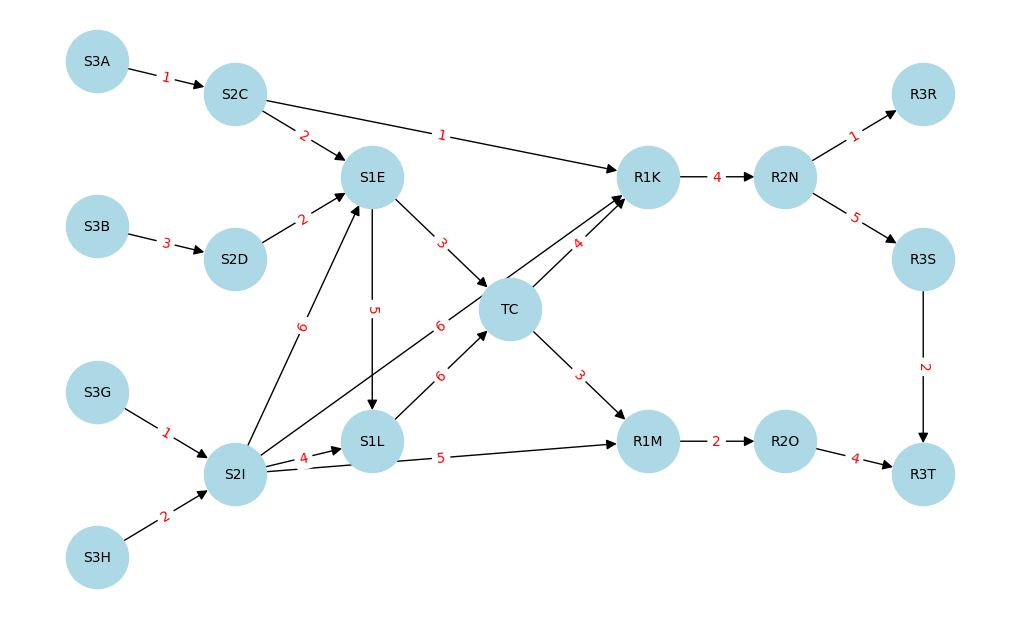

In [72]:
# Creating a directed graph
G = nx.DiGraph()

# Adding the nodes
nodes = [
    "S3A", "S3B", "S3G", "S3H",
    "S2C", "S2D", "S2I",
    "S1E", "S1L", "TC",
    "R1K", "R1M", "R2N", "R2O",
    "R3R", "R3S", "R3T"
]
G.add_nodes_from(nodes)

# Adding edges with weights
edges = [
    ("S3A", "S2C", 1), ("S3B", "S2D", 3), ("S3G", "S2I", 1), ("S3H", "S2I", 2),
    ("S2C", "S1E", 2), ("S2D", "S1E", 2), ("S2I", "S1E", 6), ("S2I", "S1L", 4),
    ("S1E", "S1L", 5), ("S1E", "TC", 3), ("S1L", "TC", 6),
    ("TC", "R1K", 4), ("TC", "R1M", 3), ("R1K", "R2N", 4), ("R1M", "R2O", 2),
    ("R2N", "R3R", 1), ("R2N", "R3S", 5), ("R3S", "R3T", 2), ("R2O", "R3T", 4),
    ("S2I", "R1K", 6), ("S2I", "R1M", 5), ("S2C", "R1K", 1)
]
G.add_weighted_edges_from(edges)

# Defining node positions to make it look good
pos = {
    "S3A": (0, 3), "S3B": (0, 2), "S3G": (0, 1), "S3H": (0, 0),
    "S2C": (1.5, 2.8), "S2D": (1.5, 1.8), "S2I": (1.5, 0.5),
    "S1E": (3, 2.3), "S1L": (3, 0.7), "TC": (4.5, 1.5),
    "R1K": (6, 2.3), "R1M": (6, 0.7), "R2N": (7.5, 2.3), "R2O": (7.5, 0.7),
    "R3R": (9, 2.8), "R3S": (9, 1.8), "R3T": (9, 0.5),
}

# Drawing graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue",
        arrows=True, arrowsize=15, font_size=10)

# Drawing edge weights
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

# Plotting generated graph
plt.axis("off")
plt.show()


# Differentiating directed and undirected edges

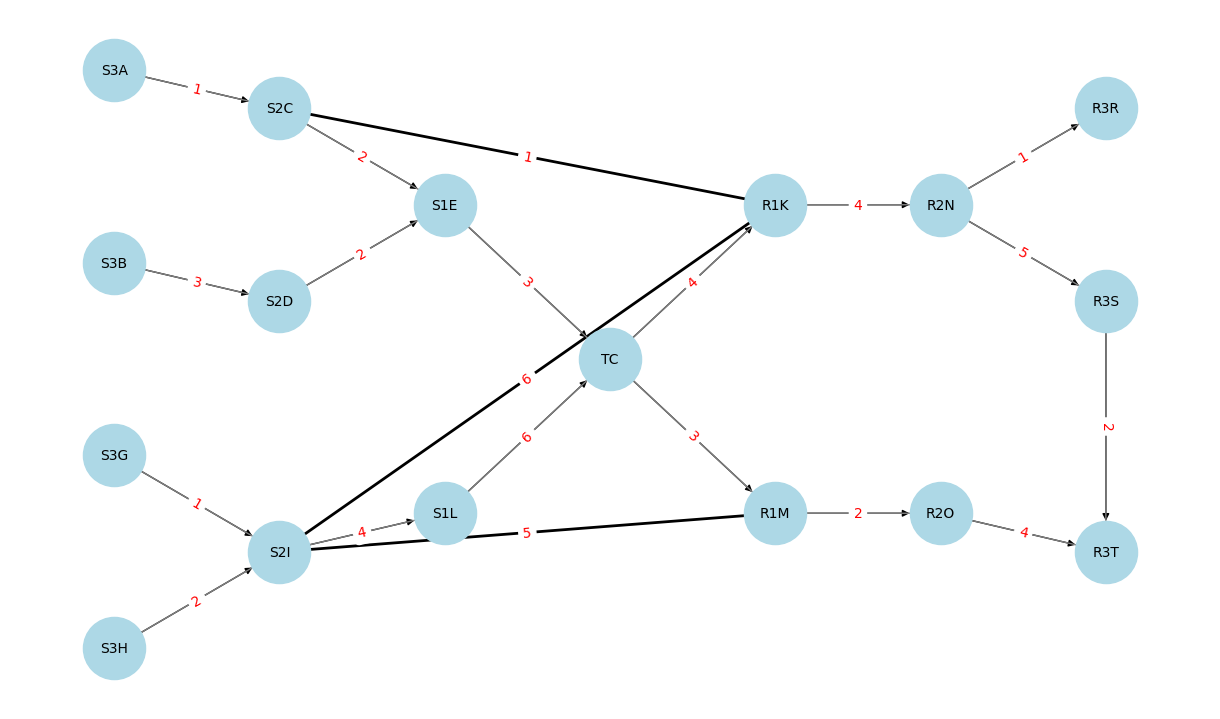

In [73]:
# Defining directed and undirected edges separately
directed_edges = [
    ("S3A", "S2C", 1), ("S3B", "S2D", 3), ("S3G", "S2I", 1), ("S3H", "S2I", 2),
    ("S2C", "S1E", 2), ("S2D", "S1E", 2), ("S2I", "S1L", 4),
    ("S1E", "TC", 3), ("S1L", "TC", 6), ("TC", "R1K", 4), ("TC", "R1M", 3),
    ("R1K", "R2N", 4), ("R1M", "R2O", 2), ("R2N", "R3R", 1), ("R2N", "R3S", 5),
    ("R3S", "R3T", 2), ("R2O", "R3T", 4)
]

undirected_edges = [("S2I", "R1K", 6), ("S2I", "R1M", 5), ("S2C", "R1K", 1)]

# Creating directed and undirected graphs
Gd = nx.DiGraph()
Gu = nx.Graph()

# Adding nodes and edges
nodes = set(node for edge in directed_edges + undirected_edges for node in edge[:2])
Gd.add_nodes_from(nodes)
Gu.add_nodes_from(nodes)

Gd.add_weighted_edges_from(directed_edges)
Gu.add_weighted_edges_from(undirected_edges)

# Defining node positions
pos = {
    "S3A": (0, 3), "S3B": (0, 2), "S3G": (0, 1), "S3H": (0, 0),
    "S2C": (1.5, 2.8), "S2D": (1.5, 1.8), "S2I": (1.5, 0.5),
    "S1E": (3, 2.3), "S1L": (3, 0.7), "TC": (4.5, 1.5),
    "R1K": (6, 2.3), "R1M": (6, 0.7), "R2N": (7.5, 2.3), "R2O": (7.5, 0.7),
    "R3R": (9, 2.8), "R3S": (9, 1.8), "R3T": (9, 0.5)
}

# Drawing the graph
plt.figure(figsize=(12, 7))
nx.draw(Gd, pos, node_size=2000, node_color="lightblue", with_labels=True, font_size=10)

# Drawing undirected edges
nx.draw_networkx_edges(Gu, pos, edge_color="black", width=2)

# Drawing directed edges
nx.draw_networkx_edges(Gd, pos, edge_color="gray", arrows=True, arrowsize=20)

# Adding edge labels
nx.draw_networkx_edge_labels(Gu, pos, edge_labels=nx.get_edge_attributes(Gu, "weight"), font_color="red")
nx.draw_networkx_edge_labels(Gd, pos, edge_labels=nx.get_edge_attributes(Gd, "weight"), font_color="red")

plt.axis("off")
plt.show()


## Making the edges presentable by curving certain edges

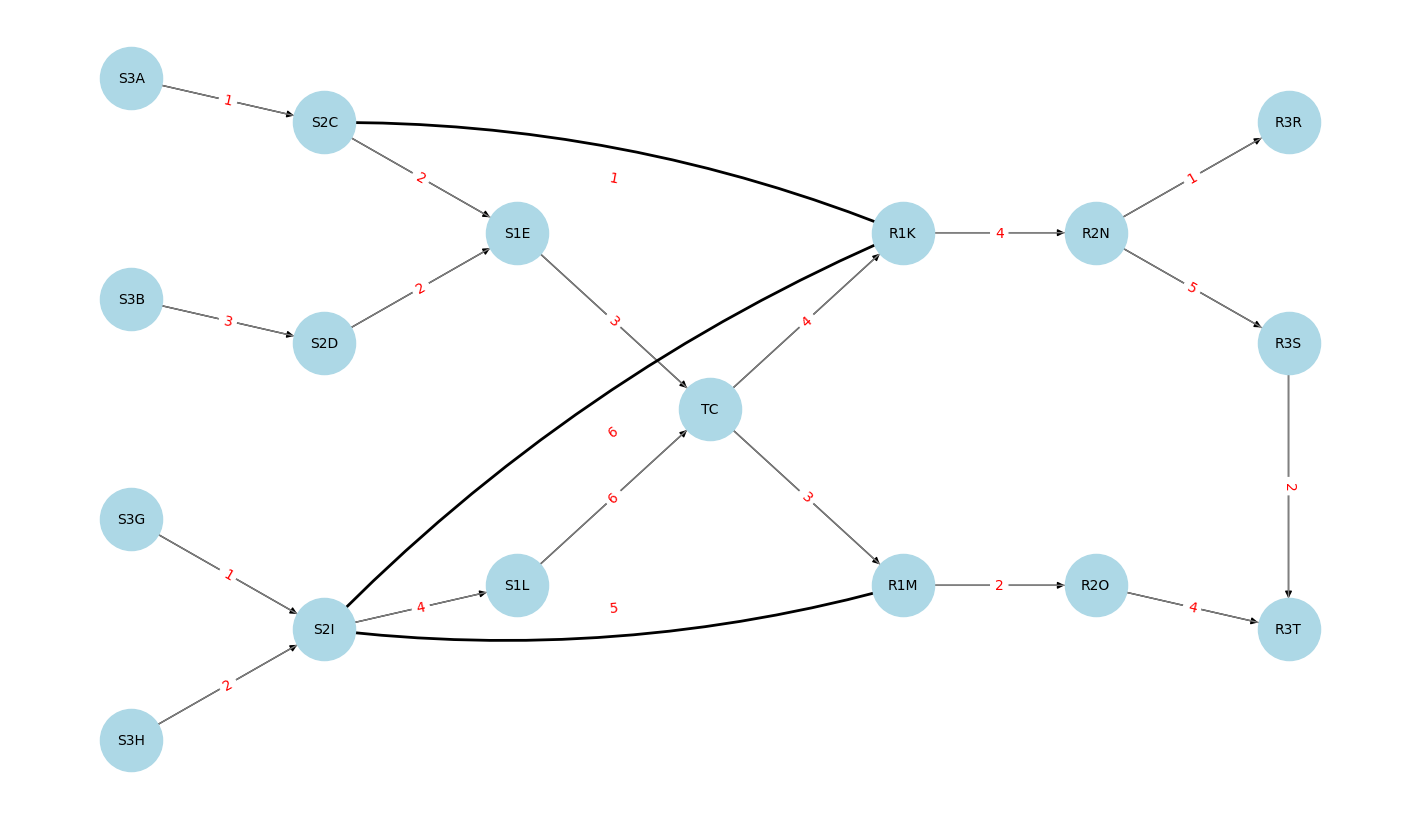

In [74]:
# Defining directed and undirected edges
directed_edges = [
    ("S3A", "S2C", 1), ("S3B", "S2D", 3), ("S3G", "S2I", 1), ("S3H", "S2I", 2),
    ("S2C", "S1E", 2), ("S2D", "S1E", 2), ("S2I", "S1L", 4), ("S1E", "TC", 3),
    ("S1L", "TC", 6), ("TC", "R1K", 4), ("TC", "R1M", 3), ("R1K", "R2N", 4),
    ("R1M", "R2O", 2), ("R2N", "R3R", 1), ("R2N", "R3S", 5), ("R3S", "R3T", 2),
    ("R2O", "R3T", 4)
]

undirected_edges = [("S2I", "R1K", 6), ("S2I", "R1M", 5), ("S2C", "R1K", 1)]

# Creating graphs
Gd = nx.DiGraph()
Gu = nx.Graph()

# Adding nodes and edges
nodes = set(node for edge in directed_edges + undirected_edges for node in edge[:2])
Gd.add_nodes_from(nodes)
Gu.add_nodes_from(nodes)

Gd.add_weighted_edges_from(directed_edges)
Gu.add_weighted_edges_from(undirected_edges)

# Defining Node positions
pos = {
    "S3A": (0, 3), "S3B": (0, 2), "S3G": (0, 1), "S3H": (0, 0),
    "S2C": (2, 2.8), "S2D": (2, 1.8), "S2I": (2, 0.5),
    "S1E": (4, 2.3), "S1L": (4, 0.7), "TC": (6, 1.5),
    "R1K": (8, 2.3), "R1M": (8, 0.7), "R2N": (10, 2.3), "R2O": (10, 0.7),
    "R3R": (12, 2.8), "R3S": (12, 1.8), "R3T": (12, 0.5)
}

# Drawing the graph
plt.figure(figsize=(14, 8))
nx.draw(Gd, pos, node_size=2000, node_color="lightblue", with_labels=True, font_size=10)
nx.draw_networkx_edges(Gd, pos, edge_color="gray", arrows=True, arrowsize=20)

# Drawing curved undirected edges
ax = plt.gca()
curves = {("S2I", "R1M"): 0.1, ("S2C", "R1K"): -0.1}
for u, v, w in undirected_edges:
    curvature = curves.get((u, v), -0.1)  # Default curvature
    edge = FancyArrowPatch(posA=pos[u], posB=pos[v], connectionstyle=f"arc3,rad={curvature}",
                           arrowstyle="-", lw=2, color='black')
    ax.add_patch(edge)

# Adding edge labels
nx.draw_networkx_edge_labels(Gu, pos, edge_labels={(u, v): w for u, v, w in undirected_edges}, font_color="red")
nx.draw_networkx_edge_labels(Gd, pos, edge_labels=nx.get_edge_attributes(Gd, "weight"), font_color="red")

plt.axis("off")
plt.show()


# Making the nodes presentable by assigning colours

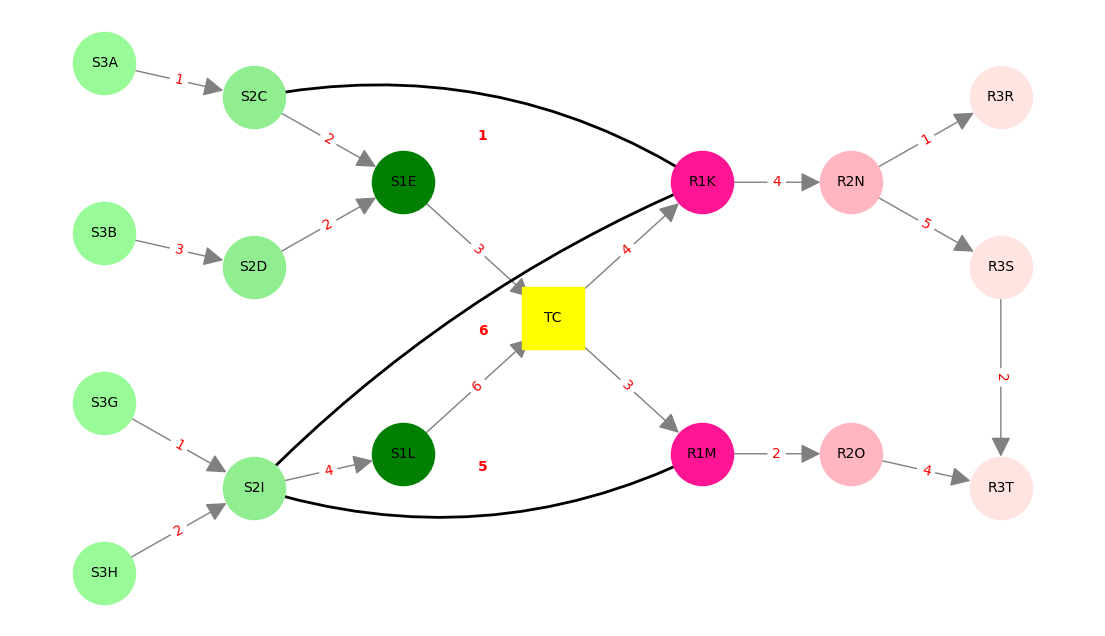

In [75]:
# Defining directed edges
directed_edges = [
    ("S3A", "S2C", 1), ("S3B", "S2D", 3), ("S3G", "S2I", 1), ("S3H", "S2I", 2),
    ("S2C", "S1E", 2), ("S2D", "S1E", 2), ("S2I", "S1L", 4), ("S1E", "TC", 3),
    ("S1L", "TC", 6), ("TC", "R1K", 4), ("TC", "R1M", 3), ("R1K", "R2N", 4),
    ("R1M", "R2O", 2), ("R2N", "R3R", 1), ("R2N", "R3S", 5), ("R3S", "R3T", 2),
    ("R2O", "R3T", 4)
]

# Defining undirected edges (will be drawn as curved arrows)
undirected_edges = [("S2I", "R1K", 6), ("S2I", "R1M", 5), ("S2C", "R1K", 1)]

# Creating a directed graph
Gd = nx.DiGraph()

# Add nodes and directed edges
nodes = set(node for edge in directed_edges + undirected_edges for node in edge[:2])
Gd.add_nodes_from(nodes)
Gd.add_weighted_edges_from(directed_edges)

# Defining the Node positions
pos = {
    "S3A": (0, 3), "S3B": (0, 2), "S3G": (0, 1), "S3H": (0, 0),
    "S2C": (2, 2.8), "S2D": (2, 1.8), "S2I": (2, 0.5),
    "S1E": (4, 2.3), "S1L": (4, 0.7), "TC": (6, 1.5),
    "R1K": (8, 2.3), "R1M": (8, 0.7), "R2N": (10, 2.3), "R2O": (10, 0.7),
    "R3R": (12, 2.8), "R3S": (12, 1.8), "R3T": (12, 0.5)
}

# Assigning colors to nodes
node_colors = {
    **{node: "palegreen" for node in ["S3A", "S3B", "S3G", "S3H"]},  # S3
    **{node: "lightgreen" for node in ["S2C", "S2D", "S2I"]},  # S2
    **{node: "green" for node in ["S1E", "S1L"]},  # S1
    **{node: "deeppink" for node in ["R1K", "R1M"]},  # R1
    **{node: "lightpink" for node in ["R2N", "R2O"]},  # R2
    **{node: "mistyrose" for node in ["R3R", "R3S", "R3T"]},  # R3
    "TC": "yellow"  # TC
}

# Draw the graph
plt.figure(figsize=(14, 8))

# Drawing nodes
for node, color in node_colors.items():
    shape = "s" if node == "TC" else "o"  # Square for TC, circle for others
    nx.draw_networkx_nodes(Gd, pos, nodelist=[node], node_color=color, node_size=2000, node_shape=shape)

# Draw the labels or weights
nx.draw_networkx_labels(Gd, pos, font_size=10)

# Drawing directed edges with visible arrows
nx.draw_networkx_edges(Gd, pos, edge_color="gray", arrows=True, arrowsize=30, node_size=2000, connectionstyle="arc3,rad=0")

# Drawing undirected edges as curved arrows
ax = plt.gca()
curves = {("S2I", "R1M"): 0.2, ("S2C", "R1K"): -0.2}  # Adjust curvature for clarity

for u, v, w in undirected_edges:
    curvature = curves.get((u, v), -0.1)  # Default curvature if not specified
    edge = FancyArrowPatch(posA=pos[u], posB=pos[v], connectionstyle=f"arc3,rad={curvature}",
                           arrowstyle="->", lw=2, color='black', mutation_scale=20)
    ax.add_patch(edge)

# Adding edge labels or weight for directed edges
nx.draw_networkx_edge_labels(Gd, pos, edge_labels=nx.get_edge_attributes(Gd, "weight"), font_color="red")

# Adding edge labels or weight for undirected edges
for u, v, w in undirected_edges:
    midpoint = ((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2)  # Find midpoint
    plt.text(midpoint[0], midpoint[1], str(w), fontsize=10, color="red", fontweight="bold")

plt.axis("off")
plt.show()


### Question-1: Compute the Forman Ricci curvature of each edge in the directed graph.

In [76]:
# Defining directed and undirected edges with weights
directed_edges = [
    ("S3A", "S2C", 1), ("S3B", "S2D", 3), ("S3G", "S2I", 1), ("S3H", "S2I", 2),
    ("S2C", "S1E", 2), ("S2D", "S1E", 2), ("S2I", "S1L", 4), ("S1E", "TC", 3),
    ("S1L", "TC", 6), ("TC", "R1K", 4), ("TC", "R1M", 3), ("R1K", "R2N", 4),
    ("R1M", "R2O", 2), ("R2N", "R3R", 1), ("R2N", "R3S", 5), ("R3S", "R3T", 2),
    ("R2O", "R3T", 4)
]

undirected_edges = [("S2I", "R1K", 6), ("S2I", "R1M", 5), ("S2C", "R1K", 1)]

# Creating directed and undirected graphs
Gd = nx.DiGraph()
Gd.add_weighted_edges_from(directed_edges)

Gu = nx.Graph()
Gu.add_weighted_edges_from(undirected_edges)

# Computing the Forman-Ricci curvature for directed edges
forman_curvature = {}
for u, v, w in directed_edges:
    sum_term_v1 = sum(np.sqrt(Gd[u][nbr]['weight'] / (w * Gd[u][nbr]['weight'])) for nbr in Gd.neighbors(u) if nbr != v)
    sum_term_v2 = sum(np.sqrt(Gd[v][nbr]['weight'] / (w * Gd[v][nbr]['weight'])) for nbr in Gd.neighbors(v))

    F_e = w * ((1 / w) + (1 / w) - sum_term_v1 - sum_term_v2)
    forman_curvature[(u, v)] = round(F_e, 2)

# Computing the Forman-Ricci curvature for undirected edges
for u, v, w in undirected_edges:
    sum_term_u = sum(np.sqrt(Gu[u][nbr]['weight'] / (w * Gu[u][nbr]['weight'])) for nbr in Gu.neighbors(u) if nbr != v)
    sum_term_v = sum(np.sqrt(Gu[v][nbr]['weight'] / (w * Gu[v][nbr]['weight'])) for nbr in Gu.neighbors(v))

    F_e = w * ((1 / w) + (1 / w) - sum_term_u - sum_term_v)
    forman_curvature[(u, v)] = round(F_e, 2)

# Converting curvature results into a DataFrame for display
curvature_df = pd.DataFrame(forman_curvature.items(), columns=["Edge", "Forman-Ricci Curvature"])

# Printing the computed curvature values
print(curvature_df)


          Edge  Forman-Ricci Curvature
0   (S3A, S2C)                    1.00
1   (S3B, S2D)                    0.27
2   (S3G, S2I)                    1.00
3   (S3H, S2I)                    0.59
4   (S2C, S1E)                    0.59
5   (S2D, S1E)                    0.59
6   (S2I, S1L)                    0.00
7    (S1E, TC)                   -1.46
8    (S1L, TC)                   -2.90
9    (TC, R1K)                   -2.00
10   (TC, R1M)                   -1.46
11  (R1K, R2N)                   -2.00
12  (R1M, R2O)                    0.59
13  (R2N, R3R)                    1.00
14  (R2N, R3S)                   -2.47
15  (R3S, R3T)                    2.00
16  (R2O, R3T)                    2.00
17  (S2I, R1K)                   -5.35
18  (S2I, R1M)                   -2.47
19  (S2C, R1K)                    0.00


### Question 2 : Use the provided image to annotate curvature values on the edges for demonstration.

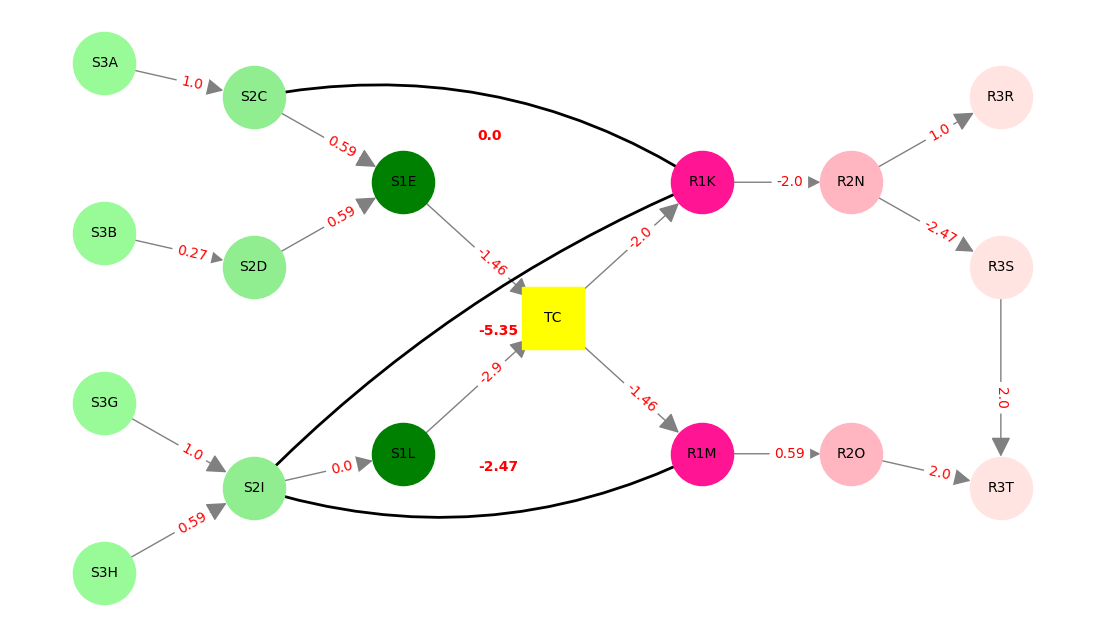

In [77]:
# Defining directed edges with weights
directed_edges = [
    ("S3A", "S2C", 1), ("S3B", "S2D", 3), ("S3G", "S2I", 1), ("S3H", "S2I", 2),
    ("S2C", "S1E", 2), ("S2D", "S1E", 2), ("S2I", "S1L", 4), ("S1E", "TC", 3),
    ("S1L", "TC", 6), ("TC", "R1K", 4), ("TC", "R1M", 3), ("R1K", "R2N", 4),
    ("R1M", "R2O", 2), ("R2N", "R3R", 1), ("R2N", "R3S", 5), ("R3S", "R3T", 2),
    ("R2O", "R3T", 4)
]

# Defining undirected edges with weights
undirected_edges = [("S2I", "R1K", 6), ("S2I", "R1M", 5), ("S2C", "R1K", 1)]

# Creating a directed graph
Gd = nx.DiGraph()
Gd.add_weighted_edges_from(directed_edges)

# Creating an undirected graph for undirected edges
Gu = nx.Graph()
Gu.add_weighted_edges_from(undirected_edges)

# Computing Forman-Ricci curvature for each directed edge
forman_curvature = {}
for u, v, w in directed_edges:
    sum_term_v1 = sum(np.sqrt(Gd[u][nbr]['weight'] / (w * Gd[u][nbr]['weight'])) for nbr in Gd.neighbors(u) if nbr != v)
    sum_term_v2 = sum(np.sqrt(Gd[v][nbr]['weight'] / (w * Gd[v][nbr]['weight'])) for nbr in Gd.neighbors(v))

    F_e = w * ((1 / w) + (1 / w) - sum_term_v1 - sum_term_v2)
    forman_curvature[(u, v)] = round(F_e, 2)

# Computing Forman-Ricci curvature for each undirected edge
for u, v, w in undirected_edges:
    sum_term_u = sum(np.sqrt(Gu[u][nbr]['weight'] / (w * Gu[u][nbr]['weight'])) for nbr in Gu.neighbors(u) if nbr != v)
    sum_term_v = sum(np.sqrt(Gu[v][nbr]['weight'] / (w * Gu[v][nbr]['weight'])) for nbr in Gu.neighbors(v))

    F_e = w * ((1 / w) + (1 / w) - sum_term_u - sum_term_v)
    forman_curvature[(u, v)] = round(F_e, 2)

# Defining node positions
pos = {
    "S3A": (0, 3), "S3B": (0, 2), "S3G": (0, 1), "S3H": (0, 0),
    "S2C": (2, 2.8), "S2D": (2, 1.8), "S2I": (2, 0.5),
    "S1E": (4, 2.3), "S1L": (4, 0.7), "TC": (6, 1.5),
    "R1K": (8, 2.3), "R1M": (8, 0.7), "R2N": (10, 2.3), "R2O": (10, 0.7),
    "R3R": (12, 2.8), "R3S": (12, 1.8), "R3T": (12, 0.5)
}

# Assigning colors to nodes
node_colors = {
    **{node: "palegreen" for node in ["S3A", "S3B", "S3G", "S3H"]},
    **{node: "lightgreen" for node in ["S2C", "S2D", "S2I"]},
    **{node: "green" for node in ["S1E", "S1L"]},
    **{node: "deeppink" for node in ["R1K", "R1M"]},
    **{node: "lightpink" for node in ["R2N", "R2O"]},
    **{node: "mistyrose" for node in ["R3R", "R3S", "R3T"]},
    "TC": "yellow"
}

# Drawing the graph
plt.figure(figsize=(14, 8))

# Drawing nodes
for node, color in node_colors.items():
    shape = "s" if node == "TC" else "o"
    nx.draw_networkx_nodes(Gd, pos, nodelist=[node], node_color=color, node_size=2000, node_shape=shape)

# Drawing labels
nx.draw_networkx_labels(Gd, pos, font_size=10)

# Drawing directed edges
nx.draw_networkx_edges(Gd, pos, edge_color="gray", arrows=True, arrowsize=30, node_size=2000, connectionstyle="arc3,rad=0")



# Annotating the Forman-Ricci curvature on directed edges
edge_curvature_labels = {edge: f"{forman_curvature[edge]}" for edge in forman_curvature if edge in Gd.edges}
nx.draw_networkx_edge_labels(Gd, pos, edge_labels=edge_curvature_labels, font_color="red", font_size=10, label_pos=0.6)

# Curving undirected edges for presentation
ax = plt.gca()
curves = {("S2I", "R1M"): 0.2, ("S2C", "R1K"): -0.2}

for u, v, w in undirected_edges:
    curvature = curves.get((u, v), -0.1)
    edge = FancyArrowPatch(posA=pos[u], posB=pos[v], connectionstyle=f"arc3,rad={curvature}",
                           arrowstyle="->", lw=2, color='black', mutation_scale=20)
    ax.add_patch(edge)

    # Annotating undirected edge curvature
    midpoint = ((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2)
    plt.text(midpoint[0], midpoint[1], str(forman_curvature[(u, v)]), fontsize=10, color="red", fontweight="bold")

plt.axis("off")
plt.show()
